In [ ]:
import cv2
import numpy as np

# Dictionary of color names and their corresponding values
colors = {
    'red': (0, 0, 255),
    'green': (0, 255, 0),
    'blue': (255, 0, 0),
    'yellow': (0, 255, 255),
    'orange': (0, 165, 255),
    'purple': (128, 0, 128),
    'pink': (255, 192, 203),
    'cyan': (0, 255, 255),
    'magenta': (255, 0, 255),
    'brown': (165, 42, 42),
    'gray': (128, 128, 128),
    'black': (0, 0, 0),
    'white': (255, 255, 255),
    'gold': (255, 215, 0),
    'silver': (192, 192, 192),
    'navy': (0, 0, 128),
    'turquoise': (64, 224, 208),
    'lavender': (230, 230, 250),
    'olive': (128, 128, 0),
    'teal': (0, 128, 128)
}

def get_color_name(rgb):
    # Calculate the Euclidean distance between the given color value and all the color values in the dictionary
    color_distances = [np.sqrt(np.sum((np.array(color) - np.array(rgb))**2)) for color in colors.values()]
    min_distance_index = np.argmin(color_distances)
    color_name = list(colors.keys())[min_distance_index]
    return color_name

def detect_color(frame):
    # Convert the frame to the HSV color space
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define color thresholds for different colors
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    lower_green = np.array([50, 100, 100])
    upper_green = np.array([70, 255, 255])
    lower_blue = np.array([110, 100, 100])
    upper_blue = np.array([130, 255, 255])

    # Threshold the image to get only the desired color regions
    red_mask = cv2.inRange(hsv_frame, lower_red, upper_red)
    green_mask = cv2.inRange(hsv_frame, lower_green, upper_green)
    blue_mask = cv2.inRange(hsv_frame, lower_blue, upper_blue)

    # Find contours in the color masks
    contours, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        cv2.drawContours(frame, [contour], -1, (0, 0, 255), 2)
        cv2.putText(frame, 'Red', (contour[0][0][0], contour[0][0][1]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    contours, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        cv2.drawContours(frame, [contour], -1, (0, 255, 0), 2)
        cv2.putText(frame, 'Green', (contour[0][0][0], contour[0][0][1]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    contours, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        cv2.drawContours(frame, [contour], -1, (255, 0, 0), 2)
        cv2.putText(frame, 'Blue', (contour[0][0][0], contour[0][0][1]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Display the frame
    cv2.imshow('ColorDetection', frame)
    cv2.waitKey(0)

# Load the image or use the video stream from a webcam
image_path = '/Users/admin/Desktop/wallpapers/blackpanther.jpg'
frame = cv2.imread(image_path)

# Perform color detection
detect_color(frame)


The dominant color in the image is: Black


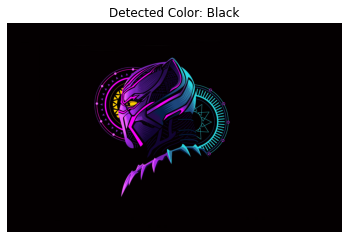

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import cv2
import numpy as np

# Dictionary of color names and their corresponding RGB values
colors = {
    'red': (0, 0, 255),
    'green': (0, 255, 0),
    'blue': (255, 0, 0),
    'yellow': (0, 255, 255),
    'orange': (0, 165, 255),
    'purple': (128, 0, 128),
    'pink': (255, 192, 203),
    'cyan': (0, 255, 255),
    'magenta': (255, 0, 255),
    'brown': (165, 42, 42),
    'gray': (128, 128, 128),
    'black': (0, 0, 0),
    'white': (255, 255, 255),
    'gold': (255, 215, 0),
    'silver': (192, 192, 192),
    'navy': (0, 0, 128),
    'turquoise': (64, 224, 208),
    'lavender': (230, 230, 250),
    'olive': (128, 128, 0),
    'teal': (0, 128, 128)
}

def get_color_name(rgb):
    # Calculate the Euclidean distance between the given RGB value and all the color values in the dictionary
    color_distances = [np.sqrt(np.sum((np.array(color) - np.array(rgb))**2)) for color in colors.values()]
    min_distance_index = np.argmin(color_distances)
    color_name = list(colors.keys())[min_distance_index]
    return color_name

def detect_color(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Reshape the image to a 1D array of pixels
    pixel_values = image.reshape((-1, 3))

    # Convert the pixel values from BGR to RGB format
    pixel_values = cv2.cvtColor(pixel_values, cv2.COLOR_BGR2RGB)

    # Calculate the dominant color (most common color)
    colors, counts = np.unique(pixel_values, axis=0, return_counts=True)
    dominant_color_index = np.argmax(counts)
    dominant_color = colors[dominant_color_index]

    # Get the color name for the dominant color
    color_name = get_color_name(dominant_color)

    return image, color_name

# Path to the image file
image_path = '/Users/admin/Desktop/wallpapers/blackpanther.jpg'

# Perform color detection on the image
image, color_name = detect_color(image_path)

# Display the detected color
print(f"The dominant color in the image is: {color_name.capitalize()}")

# Display the image with the detected color name as text
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f'Detected Color: {color_name.capitalize()}')
plt.axis('off')
plt.show()
